In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import matplotlib
warnings.filterwarnings('ignore')

In [2]:
missing_values=['\t43' , '\t?' , '\tno' , '\tyes' , ' yes', np.nan , 'NaN', 'ckd\t']
data = pd.read_csv('../input/ckdisease/kidney_disease.csv', na_values = missing_values)

In [3]:
data.shape

(400, 26)

In [4]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              399 non-null    float64
 1   age             385 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             314 non-null    float64
 17  wc              294 non-null    flo

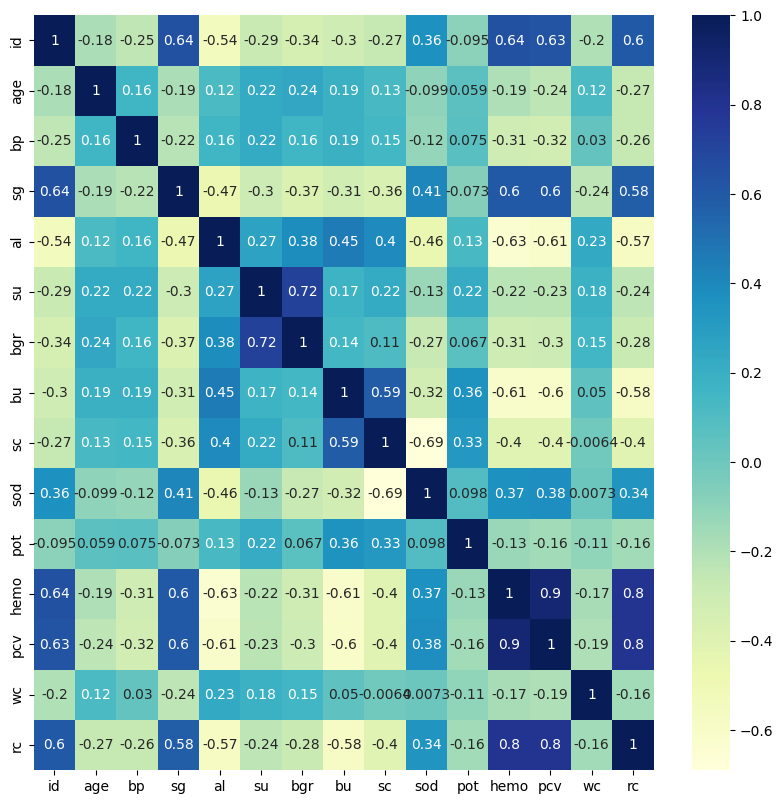

In [6]:
plt.figure(figsize = (10,10), dpi=100)
data.corr()
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

Firstly we will check for duplicate data and remove it

In [7]:
data.duplicated().sum()

0

Now we will look for missing values

In [8]:
data.isnull().sum()

id                  1
age                15
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                86
wc                106
rc                131
htn                 2
dm                  8
cad                 4
appet               1
pe                  1
ane                 1
classification      2
dtype: int64

In [9]:
for col in data.columns:
    missing = np.mean(data[col].isnull())
    print('{} - {}% \tmissing data'.format(col, round(missing*100)))

id - 0% 	missing data
age - 4% 	missing data
bp - 3% 	missing data
sg - 12% 	missing data
al - 12% 	missing data
su - 12% 	missing data
rbc - 38% 	missing data
pc - 16% 	missing data
pcc - 1% 	missing data
ba - 1% 	missing data
bgr - 11% 	missing data
bu - 5% 	missing data
sc - 4% 	missing data
sod - 22% 	missing data
pot - 22% 	missing data
hemo - 13% 	missing data
pcv - 22% 	missing data
wc - 26% 	missing data
rc - 33% 	missing data
htn - 0% 	missing data
dm - 2% 	missing data
cad - 1% 	missing data
appet - 0% 	missing data
pe - 0% 	missing data
ane - 0% 	missing data
classification - 0% 	missing data


In [10]:
data_copy = data.copy()

**Firstly we will solve for numerical columns**

In [11]:
data_numerical = data.drop('id', axis=1).select_dtypes(include = [np.number])
numerical_cols = data_numerical.columns.values

In [12]:
numerical_mean = ['bu', 'sc']
numerical_ffill = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'sod',
                   'pot', 'hemo', 'pcv', 'wc', 'rc']

In [13]:
data_categorical = data.select_dtypes(exclude = [np.number])
categorical_cols = data_categorical.columns.values

In [14]:
data[numerical_ffill] = data[numerical_ffill].fillna(method = 'ffill')
data[categorical_cols] = data[categorical_cols].fillna(method = 'ffill')
data.isnull().sum()

id                 1
age                0
bp                 0
sg                 0
al                 0
su                 0
rbc                2
pc                 0
pcc                0
ba                 0
bgr                0
bu                19
sc                17
sod                3
pot                3
hemo               0
pcv                0
wc                 0
rc                 0
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

In [15]:
data['rbc'].fillna('normal', inplace = True)

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [17]:
data.drop('id', axis=1, inplace = True)

In [18]:
target = data['classification']
features = data.drop(['classification'], axis = 1)

In [19]:
#Define pipeline
mean_Imputer = Pipeline(steps=[("imputer", SimpleImputer(strategy = "mean"))])
preprocessor = ColumnTransformer(transformers = [("mean imputer 1", mean_Imputer, numerical_mean),
                                 ("mean imputer 2", mean_Imputer, numerical_ffill)])
preprocessor.fit(data)
data_new = preprocessor.transform(data)

In [20]:
data_clean = pd.DataFrame(data_new, columns = numerical_mean+numerical_ffill)
data_clean.columns

Index(['bu', 'sc', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

In [21]:
df = data_clean.join(data[categorical_cols])

In [22]:
df_numerical = df.select_dtypes(include = [np.number])
numerical_cols = df_numerical.columns.values
print(numerical_cols)

['bu' 'sc' 'age' 'bp' 'sg' 'al' 'su' 'bgr' 'sod' 'pot' 'hemo' 'pcv' 'wc'
 'rc']


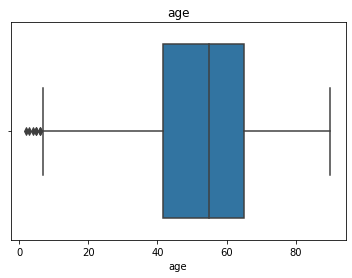

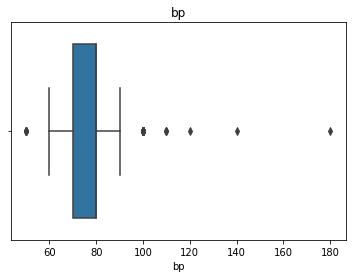

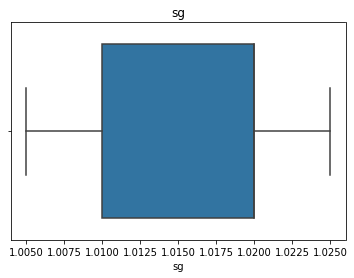

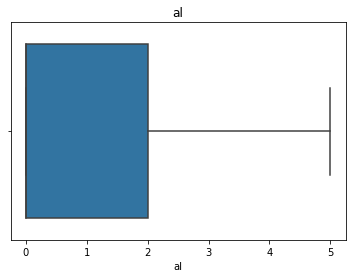

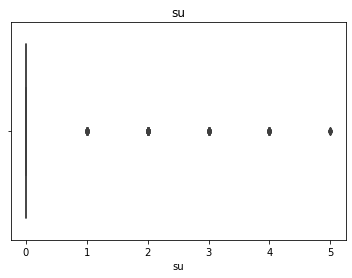

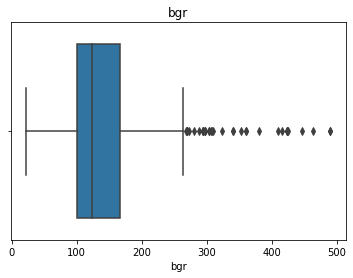

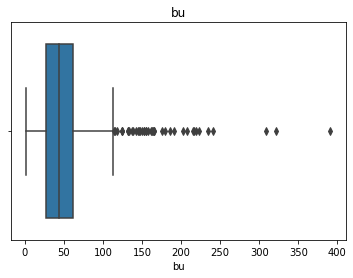

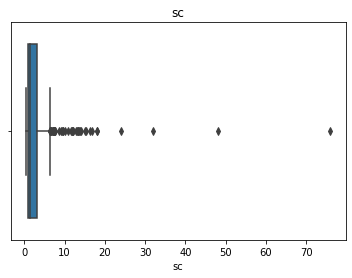

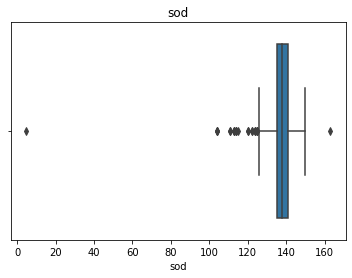

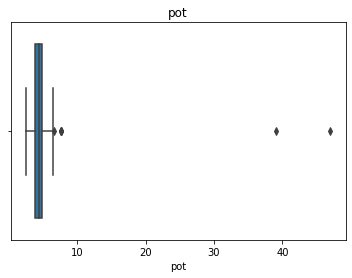

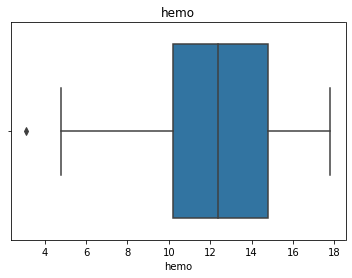

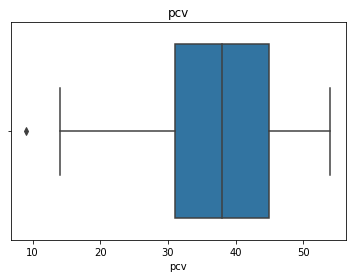

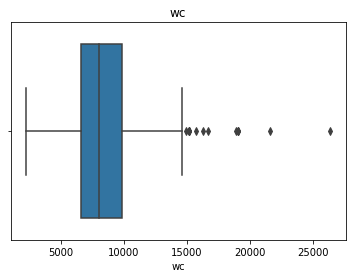

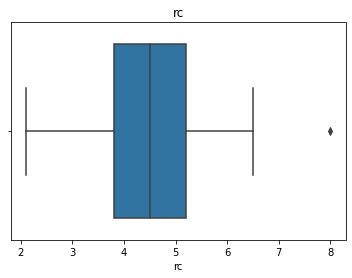

In [23]:
for i in data_numerical.columns:
    sns.boxplot(df_numerical[i])
    plt.title(i)
    plt.show()

In [24]:
target = df['classification']
features = df.drop(['classification'], axis = 1)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(target)

In [26]:
le = LabelEncoder()

for i in features.select_dtypes(exclude = [np.number]).columns:
    features[i] = le.fit_transform(data[i])

In [27]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
minmax.fit(features)

MinMaxScaler()

In [28]:
new_features = minmax.transform(features)
print(new_features)

[[0.0885751  0.01058201 0.52272727 ... 0.         0.         0.        ]
 [0.042362   0.00529101 0.05681818 ... 0.         0.         0.        ]
 [0.1322208  0.01851852 0.68181818 ... 1.         0.         1.        ]
 ...
 [0.06290116 0.0026455  0.11363636 ... 0.         0.         0.        ]
 [0.12451861 0.00793651 0.17045455 ... 0.         0.         0.        ]
 [0.042362   0.00925926 0.63636364 ... 0.         0.         0.        ]]


In [29]:
print(new_features.shape)

(400, 24)


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_features, y, test_size = 0.2, random_state = 42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(320, 24) (80, 24) (320,) (80,)


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

In [32]:
def check(model, title = "Default"):
    %time model.fit(x_train, y_train)
    preds = model.predict(x_test)
    print(confusion_matrix(y_test, preds))
    scores = round(cross_val_score(model, new_features, y, cv = 5).mean(), 5)
    auc_score = roc_auc_score(y_test, preds)
    print('Accuracy for', title, ':', model.score(x_test, y_test))
    print('ROC AUC Score: ', auc_score)
    print('Cross-Validation Score: ', scores, '\n')

In [33]:
rfc = RandomForestClassifier()
check(rfc, "RFC")

CPU times: user 195 ms, sys: 416 µs, total: 195 ms
Wall time: 207 ms
[[52  0]
 [ 0 28]]
Accuracy for RFC : 1.0
ROC AUC Score:  1.0
Cross-Validation Score:  1.0 



In [34]:
dtc = DecisionTreeClassifier()
check(dtc, "DTC")

CPU times: user 1.1 ms, sys: 0 ns, total: 1.1 ms
Wall time: 1.11 ms
[[51  1]
 [ 0 28]]
Accuracy for DTC : 0.9875
ROC AUC Score:  0.9903846153846153
Cross-Validation Score:  0.9825 



In [35]:
gbc = GradientBoostingClassifier()
check(gbc, "GBC")

CPU times: user 136 ms, sys: 0 ns, total: 136 ms
Wall time: 136 ms
[[51  1]
 [ 0 28]]
Accuracy for GBC : 0.9875
ROC AUC Score:  0.9903846153846153
Cross-Validation Score:  0.985 



In [36]:
lr = LogisticRegression()
check(lr, "LR")

CPU times: user 10.5 ms, sys: 454 µs, total: 10.9 ms
Wall time: 15 ms
[[51  1]
 [ 0 28]]
Accuracy for LR : 0.9875
ROC AUC Score:  0.9903846153846153
Cross-Validation Score:  0.9825 



In [37]:
svc = SVC()
check(svc, "SVC")

CPU times: user 1.45 ms, sys: 1.88 ms, total: 3.33 ms
Wall time: 2.94 ms
[[51  1]
 [ 0 28]]
Accuracy for SVC : 0.9875
ROC AUC Score:  0.9903846153846153
Cross-Validation Score:  0.9925 



In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = {'n_neighbors': np.arange(1,10)}, cv = 5)
knn_grid.fit(new_features, y)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [39]:
knn_grid.best_params_

{'n_neighbors': 2}

In [40]:
knn2 = KNeighborsClassifier(n_neighbors = 2)
check(knn2, "KNN2")

CPU times: user 317 µs, sys: 1.1 ms, total: 1.42 ms
Wall time: 1.27 ms
[[51  1]
 [ 0 28]]
Accuracy for KNN2 : 0.9875
ROC AUC Score:  0.9903846153846153
Cross-Validation Score:  0.995 

